In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
!git clone https://github.com/pratikkayal/PlantDoc-Dataset

Cloning into 'PlantDoc-Dataset'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 2670 (delta 23), reused 41 (delta 22), pack-reused 2628
Receiving objects: 100% (2670/2670), 932.92 MiB | 19.85 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (2581/2581), done.


In [3]:
base_dir = '/content/PlantDoc-Dataset'
#!find $dir_base -type d -print

In [4]:
dir_train=os.path.join(base_dir, 'train')
dir_test=os.path.join(base_dir, 'test')

Количество изображений каждого класса в тренировочной и тестовой выборках

In [5]:
for plant_train in os.listdir(dir_train):
  i=0
  for plant_test in os.listdir(dir_test):
    i+=1
    if(plant_train==plant_test):
      print(plant_train)
      print('  train:',len(os.listdir(os.path.join(dir_train, plant_train))))
      print('  test:',len(os.listdir(os.path.join(dir_test, plant_test))))
      break
    else:
      if i==len(os.listdir(dir_test)):
        print('НЕТ в test',plant_train)

Tomato leaf bacterial spot
  train: 101
  test: 9
Strawberry leaf
  train: 88
  test: 8
Corn Gray leaf spot
  train: 64
  test: 4
Tomato leaf mosaic virus
  train: 44
  test: 10
Tomato Septoria leaf spot
  train: 140
  test: 11
Tomato leaf yellow virus
  train: 70
  test: 6
Blueberry leaf
  train: 106
  test: 11
Squash Powdery mildew leaf
  train: 124
  test: 6
Soyabean leaf
  train: 57
  test: 8
Raspberry leaf
  train: 112
  test: 7
Bell_pepper leaf
  train: 53
  test: 8
Tomato leaf
  train: 55
  test: 8
Tomato leaf late blight
  train: 101
  test: 10
Potato leaf early blight
  train: 109
  test: 8
Apple leaf
  train: 82
  test: 9
Corn rust leaf
  train: 106
  test: 10
Apple Scab Leaf
  train: 83
  test: 10
Cherry leaf
  train: 47
  test: 10
Bell_pepper leaf spot
  train: 62
  test: 9
Corn leaf blight
  train: 180
  test: 12
Peach leaf
  train: 103
  test: 9
grape leaf black rot
  train: 56
  test: 8
Tomato mold leaf
  train: 85
  test: 6
Apple rust leaf
  train: 79
  test: 10
НЕТ в t

Удаление класса Tomato two spotted spider mites leaf, так как он не содержится в тестовой выборке, а в обучающей имеет только 2 изображения

In [6]:
import shutil

shutil.rmtree(os.path.join(dir_train, 'Tomato two spotted spider mites leaf'))

In [7]:
batch_size = 32
#batch_size = 8
train_generator = tf.keras.utils.image_dataset_from_directory(
    directory="PlantDoc-Dataset/train/",
    image_size=(224,224),
    color_mode="rgb",
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = tf.keras.utils.image_dataset_from_directory(
    directory="PlantDoc-Dataset/train/",
    image_size=(224, 224),
    color_mode="rgb",
    validation_split=0.2,
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = tf.keras.utils.image_dataset_from_directory(
    directory="PlantDoc-Dataset/test/",
    image_size=(224,224),
    color_mode="rgb",
    batch_size=1,
    shuffle=False,
    seed=42
)

Found 2340 files belonging to 27 classes.
Using 1872 files for training.
Found 2340 files belonging to 27 classes.
Using 468 files for validation.
Found 236 files belonging to 27 classes.


In [8]:
class_names = train_generator.class_names
print(class_names)

['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot']


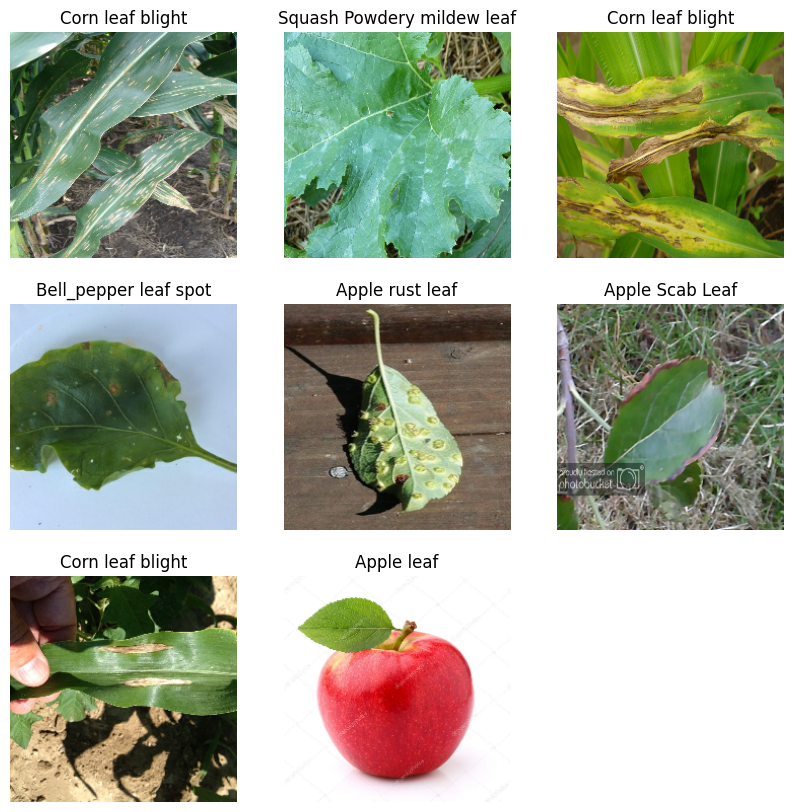

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_generator = train_generator.cache().prefetch(buffer_size=AUTOTUNE)
valid_generator = valid_generator.cache().prefetch(buffer_size=AUTOTUNE)
test_generator = test_generator.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D


base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)


x = Dropout(0.2)(x)
x = Flatten()(x)


x = Dense(1024, activation='relu')(x)
predictions = Dense(27, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


#for layer in base_model.layers:
#    layer.trainable = False

29084464/29084464 [==============================] - 1s 0us/step


In [12]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 zero_padding2d
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_1
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block6_

In [13]:
for layer in model.layers[:184]:
   layer.trainable = False
for layer in model.layers[184:]:
   layer.trainable = True


model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
from time import time
import os
import psutil
 
# inner psutil function
def process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

In [15]:
t0 = time()
mem_before = process_memory()

history = model.fit_generator(train_generator,
                    validation_data = valid_generator,
                    epochs=5)
mem_after = process_memory()
print(mem_after - mem_before)
t1 = time()
vtime = t1 - t0
print(f'time: {vtime} sec %%')

<ipython-input-15-c64a22516fa0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


59/59 [==============================] - 793s 13s/step - loss: 2.9885 - accuracy: 0.1923 - val_loss: 4.0879 - val_accuracy: 0.1197
Epoch 2/5
59/59 [==============================] - 660s 11s/step - loss: 2.2006 - accuracy: 0.3381 - val_loss: 2.8739 - val_accuracy: 0.2201
Epoch 3/5
59/59 [==============================] - 669s 11s/step - loss: 1.7132 - accuracy: 0.4642 - val_loss: 3.7044 - val_accuracy: 0.2350
Epoch 4/5
59/59 [==============================] - 669s 11s/step - loss: 1.3458 - accuracy: 0.5486 - val_loss: 3.2683 - val_accuracy: 0.2949
Epoch 5/5
59/59 [==============================] - 654s 11s/step - loss: 1.0740 - accuracy: 0.6362 - val_loss: 3.2733 - val_accuracy: 0.3397
3198476288
time: 3458.170467853546 sec %%


In [16]:
#model.summary()

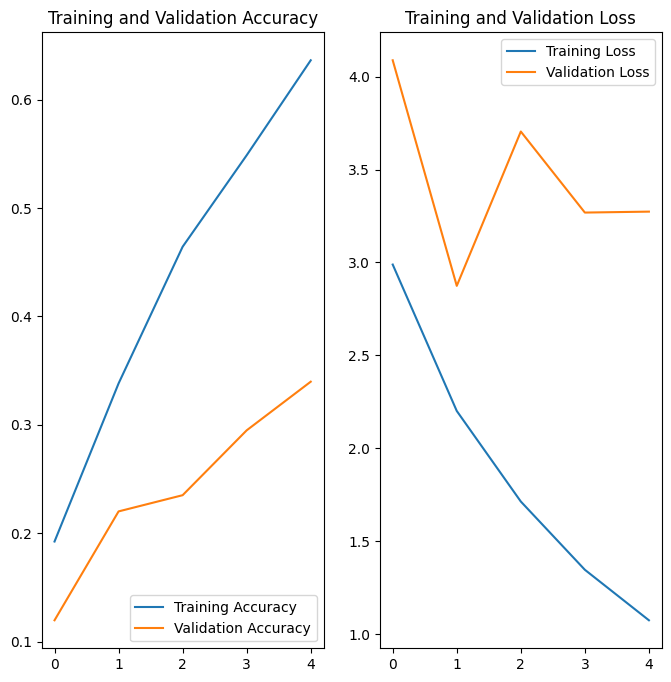

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

236/236 [==============================] - 47s 191ms/step
This image most likely belongs to Tomato leaf bacterial spot with a 5.37 percent confidence.


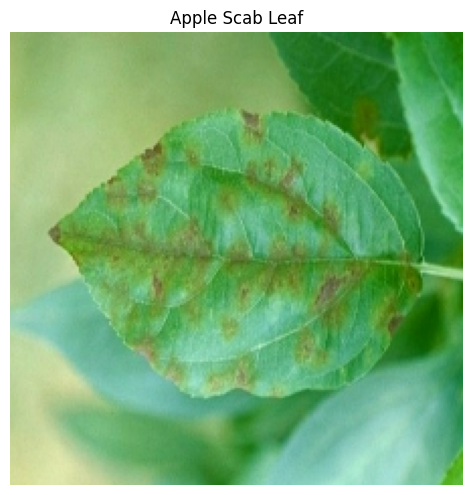

In [18]:
import numpy as np

test_predictions = model.predict(test_generator)
score = tf.nn.softmax(test_predictions[0])

plt.figure(figsize=(20, 20))
for images, labels in test_generator.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [20]:
from tensorflow import keras,lite


keras_file = "linear.h5"
tf.keras.models.save_model(model,keras_file)
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open("linear.tflite","wb").write(tfmodel)

32198592

In [21]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
236/236 [==============================] - 45s 189ms/step - loss: 3.6896 - accuracy: 0.2627
test loss, test acc: [3.68955659866333, 0.26271185278892517]
